# dynamic_stock_model

### Dynamic Stock Modelling in Python - Documentation and Tutorial

Dynamic models of material and product stocks require standard routines for computation. The dynamic_stock_model package offers a toolbox for computation and modification of dynamic stock models, including inflow-driven (van der Voet 2002) and stock-driven (MÃ¼ller 2006) modelling.
This project is work in progress, and a first, unit-tested version is released on GitHub.
Below you find a quick tutorial and demonstration of the central feastures of the class DynamicStockModel.

### Dependencies

Python 3.0 or later <br>
numpy<br>
scipy<br>
matplotlib.pyplot<br>

### Installation and import

#### a) Installation from the web repository

This is the easiest way of installing dynamic\_stock\_model. Github hosts an installation package for dynamic\_stock\_model, which can be downloaded directly from the command line using pip:

    pip install dynamic_stock_model


#### b) Installation as package

Pull the package via git pull or download as .zip file and unpack. Choose a convenient location (Here: 'C:\MyPythonPackages\'). Then open a console, change to the directory ../dynamic\_stock\_model-master/, and install the package from the command line:

    python setup.py install

This makes the package available to Python. At any other place in a system with the same python installation, dynamic_stock_model is now ready to be imported simply by

    import dynamic_stock_model

This setup also allows us to run the unit test:

    import unittest

    import dynamic_stock_model

    import dynamic_stock_model.tests

    unittest.main(dynamic_stock_model.tests, verbosity=2)

Or, to run a specific test

    unittest.main(dynamic_stock_model.tests.test_known_results, verbosity=2)


#### c) Manual installation, by modifying the python path

Pull package via git pull or download as .zip file and unpack. Choose a convenient location (Here: 'C:\MyPythonPackages\'). 
The folder with the class is called dynamic\_stock\_model-master, and there is another folder named pydsm inside. The latter one contains the actual class, you can see this from the presence of \_\_init\_\_.py 
Then the class needs to be imported. This can be done by adding the path of the class file dynamic_stock_model.py to the system path, and to import the class from there:

In [1]:
import sys
sys.path.append('C:\\MyPythonPackages\\dynamic_stock_model-master\\dynamic_stock_model\\') 

Just put your own path in the command above, and use \\ for subfolders. Again, the paths needs to point to the folder where the \_\_init\_\_.py is located.
Now, the class can be imported:

In [2]:
from dynamic_stock_model import DynamicStockModel

### A simple example: inflow-driven model

Now, the class is ready to use. 
First, we define simpe test model with a time vector t from 1 to 10, and inflow i from 2.5 t0 11.5 in steps of 1, and a normally distributed lifetime of 5 years with standard deviation 1.5 years.

In [3]:
import numpy as np
TestDSM = DynamicStockModel(t = np.arange(1,11,1), i = np.arange(2.5,12.5,1), lt = {'Type': 'Normal', 'Mean': np.array([5]), 'StdDev': np.array([1.5]) })

Let's check the attributes of the object we just defined:

In [4]:
TestDSM.t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
TestDSM.i

array([  2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,  11.5])

In [6]:
TestDSM.lt

{'Mean': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'StdDev': array([ 1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5]),
 'Type': 'Normal'}

Regarding the attribute lt, you can see that the class automatically expands the lifetime distribution parameters from scalar to vector. <br>
At any time, we can determine a checkstring that describes the content of the TestDSM object:

In [7]:
CheckStr, ExitFlag = TestDSM.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 10 years.<br>Inflow vector is present with 10 years.<br>Total stock is not present.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [5 5 5 5 5 5 5 5 5 5].<br>


The check string comes in simple html format to be included in html logfiles. <br>
Now, we compute the stock s(t,t') of age-cohort t' in year t as
$$s(t,t') = i(t')\cdot(1-\sum_{t''=0}^{t-t'}\lambda(t'')) $$
Here, $\lambda(t'')$ is the probability function of discard at age $t''$. It is determined using the lifetime distribution type specified above. The full model is docomented here: http://pubs.acs.org/doi/suppl/10.1021/es201904c/suppl_file/es201904c_si_001.pdf <br>
The result is the stock, broken down by age-cohort:

In [8]:
Stock_by_cohort, ExitFlag = TestDSM.compute_s_c_inflow_driven()
print(Stock_by_cohort)

[[  2.50000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.48100669e+00   3.50000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.39102175e+00   3.47340937e+00   4.50000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.11767162e+00   3.34743044e+00   4.46581204e+00   5.50000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.58525828e+00   2.96474027e+00   4.30383914e+00   5.45821472e+00
    6.50000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.20354478e-01   2.21936159e+00   3.81180892e+00   5.26024784e+00
    6.45061739e+00   7.50000000e+00   0.00000

The dimension of the stock is 10x10. The row index is the model year, the column index is the age-cohort. <br>
The __'ExitFlag'__ parameter indicates the termination state of the method that was just called, here: compute_s_c_inflow_driven(). If everything went allright, the ExitFlag equals 1. If a problem occurred, the ExitFlag will have a different value, which indicates the source of the problem. To find out what exactly went wrong you need to open the class file pydsm.py and check the comments for the code for the method that just failed to produce a result. <br>
We continue by computing the total stock, the outflow by age-cohort, the total outflow, and the stock change:

In [9]:
S, ExitFlag   = TestDSM.compute_stock_total()
print(S)

[  2.5          5.98100669  10.36443111  15.43091411  20.81205241
  26.16239022  31.34845648  36.41634907  41.44009312  46.45468629]


In [10]:
O_C, ExitFlag = TestDSM.compute_o_c_from_s_c()
print(O_C)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.01899331  0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.08998494  0.02659063  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.27335012  0.12597892  0.03418796  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.53241334  0.38269017  0.1619729   0.04178528  0.          0.          0.
   0.          0.          0.        ]
 [ 0.6649038   0.74537868  0.49203022  0.19796688  0.04938261  0.          0.
   0.          0.          0.        ]
 [ 0.53241334  0.93086532  0.95834402  0.60137027  0.23396085  0.05697993
   0.          0.          0.          0.        ]
 [ 0.27335012  0.74537868  1.19682684  1.17130935  0.71071032  0.26995483
   0.06457725  0.          0.          0.        ]
 [ 0.08998494  0.38269017  0.95834402  1.4627883

In [11]:
O, ExitFlag   = TestDSM.compute_outflow_total()
print(O)

[ 0.          0.01899331  0.11657558  0.433517    1.1188617   2.14966219
  3.31393374  4.43210741  5.47625595  6.48540683]


In [12]:
DS, ExitFlag  = TestDSM.compute_stock_change()
print(DS)

[ 2.5         3.48100669  4.38342442  5.066483    5.3811383   5.35033781
  5.18606626  5.06789259  5.02374405  5.01459317]


Now the dynamic stock is fully determined: Both stock and outflow are broken down by age-cohort and as total. We can make a final check by printing the dimension check and by computing the stock balance:

In [13]:
print(TestDSM.dimension_check()[0]) # dimension_check returns two variables, but we only print the first one, which has index 0.

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 10 years.<br>Inflow vector is present with 10 years.<br>Total stock is present with 10 years.<br>Stock by cohorts is present with 10 years and 10 cohorts.<br>Total outflow is present with 10 years.<br>Outflow by cohorts is present with 10 years and 10 cohorts.<br>Lifetime distribution is present with type Normal and mean [5 5 5 5 5 5 5 5 5 5].<br>


In [14]:
Bal, ExitFlag = TestDSM.check_stock_balance()
print(Bal)

[  0.00000000e+00   0.00000000e+00   8.88178420e-16   0.00000000e+00
  -1.77635684e-15   3.55271368e-15  -3.55271368e-15   4.44089210e-15
  -7.10542736e-15   8.88178420e-16]


Let's make a few plots to see what happened:

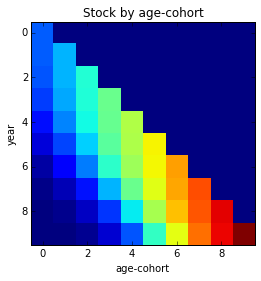

In [15]:
%matplotlib inline
# this is only for the IPython notebook, not part of the python script!

import matplotlib.pyplot as plt
plt.imshow(TestDSM.s_c, interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Stock by age-cohort')
plt.show();

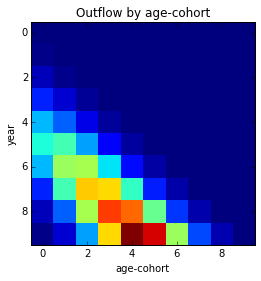

In [16]:
plt.imshow(TestDSM.o_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Outflow by age-cohort')
plt.show();

### Example for stock-driven model

In stock-driven modelling, only the stock is known at first, and we want to know the inflow, the outflow, and the cohort structure of both stock and outflow. The pyDSM class can do that. Let's create a new DSm object with a time vector t, a stock vector s, and a normally distributed lifetime with mean 4 years and stddev 1 year

In [17]:
TestDSMX = DynamicStockModel(t = np.arange(1,11,1), s = np.array([  2.5,   6. ,  10.5,  16. ,  22.5,  27.5,  32.5,  37.5,  42.5,  47.5]), lt = {'Type': 'Normal', 'Mean': np.array([4]), 'StdDev': np.array([1.0]) })
CheckStr, ExitFlag = TestDSMX.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 10 years.<br>Inflow is not present.<br>Total stock is present with 10 years.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [4 4 4 4 4 4 4 4 4 4].<br>


As above, we now call a sequence of methods to find all the missing information in the stock model. The central method for stock-driven modelling is __compute_stock_driven_model()__, which contains a recursive calculation starting from the fist year to determine outflow, inflow, and stock by cohorts using the lifetime model and the mass balance. The model is documented here:
http://pubs.acs.org/doi/suppl/10.1021/es201904c/suppl_file/es201904c_si_001.pdf

In [18]:
S_C, O_C, I, ExitFlag = TestDSMX.compute_stock_driven_model()
O, ExitFlag   = TestDSMX.compute_outflow_total()
DS, ExitFlag  = TestDSMX.compute_stock_change()
Bal, ExitFlag = TestDSMX.check_stock_balance()
print(Bal)

[  0.00000000e+00   0.00000000e+00  -8.88178420e-16   0.00000000e+00
   0.00000000e+00  -8.88178420e-16  -3.55271368e-15   2.66453526e-15
  -3.55271368e-15   1.77635684e-15]


Well, let's have a look!

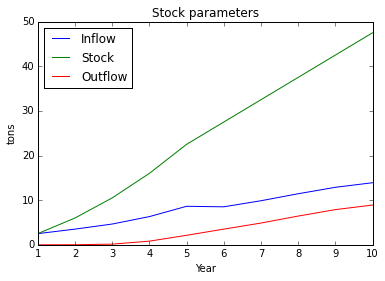

In [19]:
plt1, = plt.plot(TestDSMX.t, TestDSMX.i)
plt2, = plt.plot(TestDSMX.t, TestDSMX.s)
plt3, = plt.plot(TestDSMX.t, TestDSMX.o)
plt.xlabel('Year')
plt.ylabel('tons')
plt.title('Stock parameters')
plt.legend([plt1,plt2,plt3], ['Inflow','Stock','Outflow'], loc = 2)
plt.show();

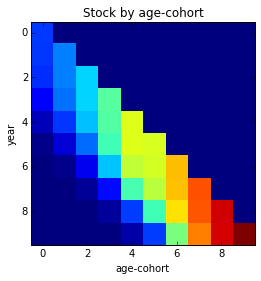

In [20]:
plt.imshow(TestDSMX.s_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Stock by age-cohort')
plt.show();

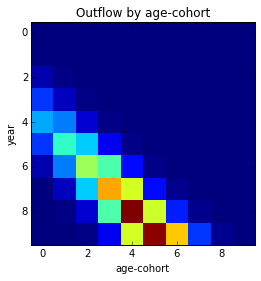

In [21]:
plt.imshow(TestDSMX.o_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Outflow by age-cohort')
plt.show();

<b> This is all for the moment. Comments are welcome!</b>